In [1]:
import glob

import xarray as xr
import numpy as np
import xesmf as xe
import dask.diagnostics
import geopandas as gp

import cmocean
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs

In [2]:
weight_files18 = glob.glob('/g/data/zv2/agcd/v1/precip/weight/r005/01day/agcd_v1_precip_weight_r005_daily_198[5-9].nc')
weight_files19 = glob.glob('/g/data/zv2/agcd/v1/precip/weight/r005/01day/agcd_v1_precip_weight_r005_daily_199*.nc')
weight_files20 = glob.glob('/g/data/zv2/agcd/v1/precip/weight/r005/01day/agcd_v1_precip_weight_r005_daily_200*.nc')
weight_files21 = glob.glob('/g/data/zv2/agcd/v1/precip/weight/r005/01day/agcd_v1_precip_weight_r005_daily_201[0-4].nc')
weight_files = weight_files18+weight_files19+weight_files20+weight_files21
weight_files.sort()
print(weight_files)

['/g/data/zv2/agcd/v1/precip/weight/r005/01day/agcd_v1_precip_weight_r005_daily_1985.nc', '/g/data/zv2/agcd/v1/precip/weight/r005/01day/agcd_v1_precip_weight_r005_daily_1986.nc', '/g/data/zv2/agcd/v1/precip/weight/r005/01day/agcd_v1_precip_weight_r005_daily_1987.nc', '/g/data/zv2/agcd/v1/precip/weight/r005/01day/agcd_v1_precip_weight_r005_daily_1988.nc', '/g/data/zv2/agcd/v1/precip/weight/r005/01day/agcd_v1_precip_weight_r005_daily_1989.nc', '/g/data/zv2/agcd/v1/precip/weight/r005/01day/agcd_v1_precip_weight_r005_daily_1990.nc', '/g/data/zv2/agcd/v1/precip/weight/r005/01day/agcd_v1_precip_weight_r005_daily_1991.nc', '/g/data/zv2/agcd/v1/precip/weight/r005/01day/agcd_v1_precip_weight_r005_daily_1992.nc', '/g/data/zv2/agcd/v1/precip/weight/r005/01day/agcd_v1_precip_weight_r005_daily_1993.nc', '/g/data/zv2/agcd/v1/precip/weight/r005/01day/agcd_v1_precip_weight_r005_daily_1994.nc', '/g/data/zv2/agcd/v1/precip/weight/r005/01day/agcd_v1_precip_weight_r005_daily_1995.nc', '/g/data/zv2/agcd/v1

In [3]:
ds_weight = xr.open_mfdataset(weight_files)
#ds_weight_sel = ds_weight.sel(time=slice("1985-01-01","2014-12-31")) # if using all weight files (e.g., weight_files = glob.glob('/g/data/zv2/agcd/v1/precip/weight/r005/01day/agcd_v1_precip_weight_r005_daily_*.nc')
count = (ds_weight['weight'] > 1.0).sum('time', keep_attrs=True)
fraction = count / len(ds_weight['time'])
da_mask = fraction > 0.9

In [4]:
da_mask

<xarray.DataArray 'weight' (lat: 691, lon: 886)>
dask.array<gt, shape=(691, 886), dtype=bool, chunksize=(691, 886), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float32 -44.5 -44.45 -44.4 -44.35 ... -10.1 -10.05 -10.0
  * lon      (lon) float32 112.0 112.1 112.1 112.2 ... 156.1 156.1 156.2 156.2

In [5]:
def plot_weights(da):
    """Plot weights"""
    
    fig = plt.figure(figsize=[10, 10])
    ax1 = fig.add_subplot(111, projection=ccrs.PlateCarree())
    da.plot(
        ax=ax1,
        transform=ccrs.PlateCarree(),
        cmap='Purples',
        cbar_kwargs = {'orientation': 'horizontal', 'label': 'weight'}
    )
    ax1.set_title('AGCD v1 daily')
    ax1.coastlines()
    ax1.add_feature(cartopy.feature.STATES, linewidth=0.3)
    ax1.set_title(f'Average coverage 1985-2014 average')
    plt.show()

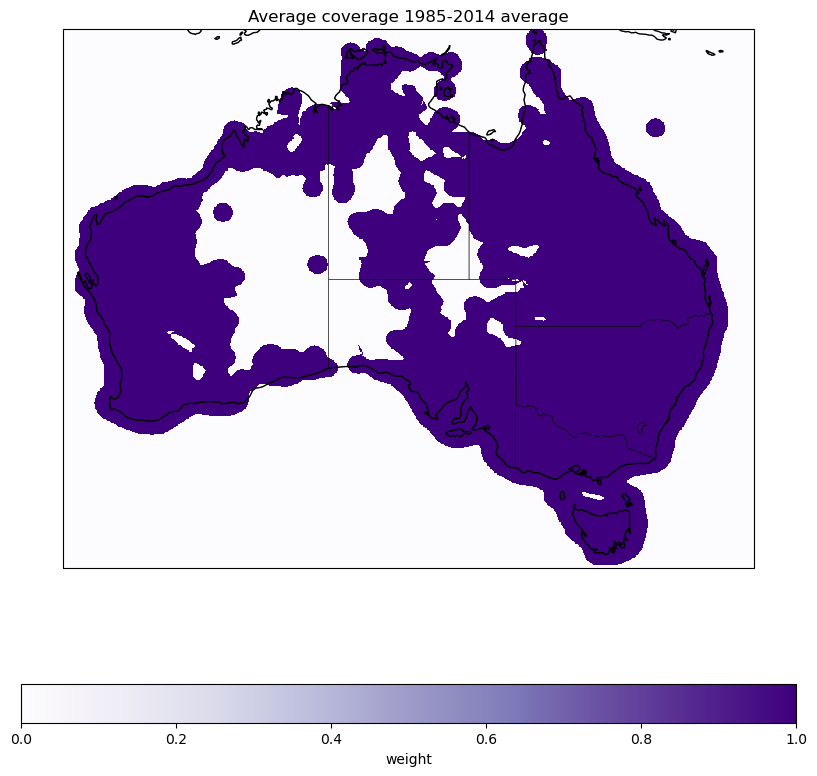

In [6]:
plot_weights(da_mask)

In [7]:
da_maskf = da_mask.astype(float).rename("data_mask")

In [8]:
da_maskf.to_netcdf("/g/data/xv83/users/bxn599/ACS/evaluation/AGCDv1_precip_weights_1985-2014_average_20230508.nc")